In [55]:
#### 1 - Copy these lines of code into your Python file
import pandas as pd
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic_data = pd.read_csv("Titanic.csv")

# Clean the dataset (handling missing values)
titanic_data.dropna(inplace=True)
print(titanic_data.head())

    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
10      1   PP 9549  16.7000    G6        S  
11      0    113783  26.5500  C103        S  


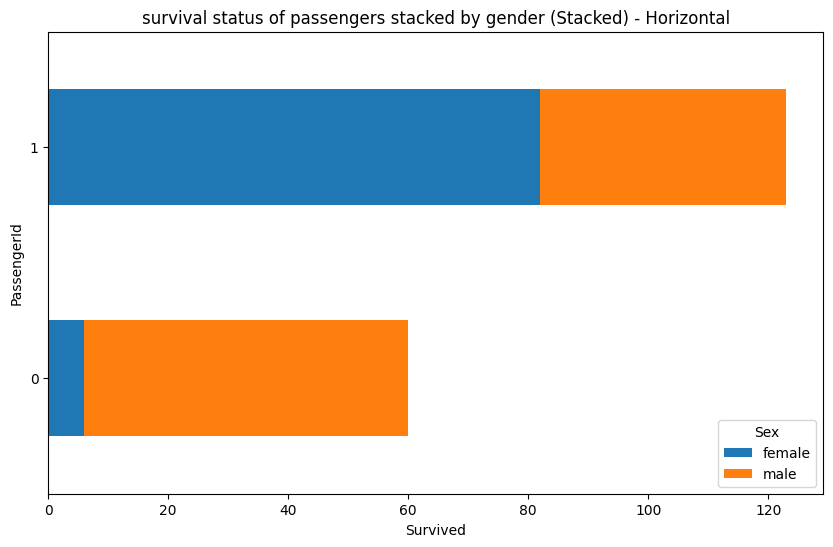

In [56]:
#### 2 - Visualization Tasks:
### 2.1 - Horizontal stacked bar chart: Using dataframe.plot(kind=’barh’), Show the survival status of passengers stacked by gender.
pivot_df = titanic_data.pivot_table(index='Survived', columns='Sex', aggfunc='size')

# Plotting
pivot_df.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('survival status of passengers stacked by gender (Stacked) - Horizontal')
plt.xlabel('Survived')
plt.ylabel('PassengerId')
plt.legend(title='Sex')
plt.show()

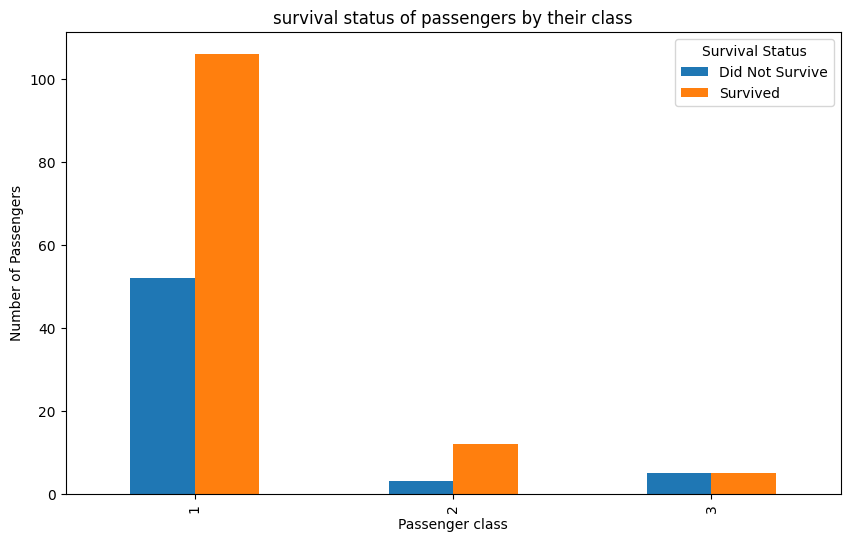

In [57]:
##### 2.2 - Multiseries Bar chart: Using dataframe.plot(kind=’bar’), compare the survival status of passengers by their class.

# Create a crosstab to get counts of survival status by passenger class
survival_by_class = pd.crosstab(titanic_data['Pclass'], titanic_data['Survived'])

# Plotting
survival_by_class.plot(kind='bar', figsize=(10, 6))
plt.title('survival status of passengers by their class')
plt.xlabel('Passenger class')
plt.ylabel('Number of Passengers')
plt.legend(['Did Not Survive', 'Survived'], title='Survival Status')

plt.show()

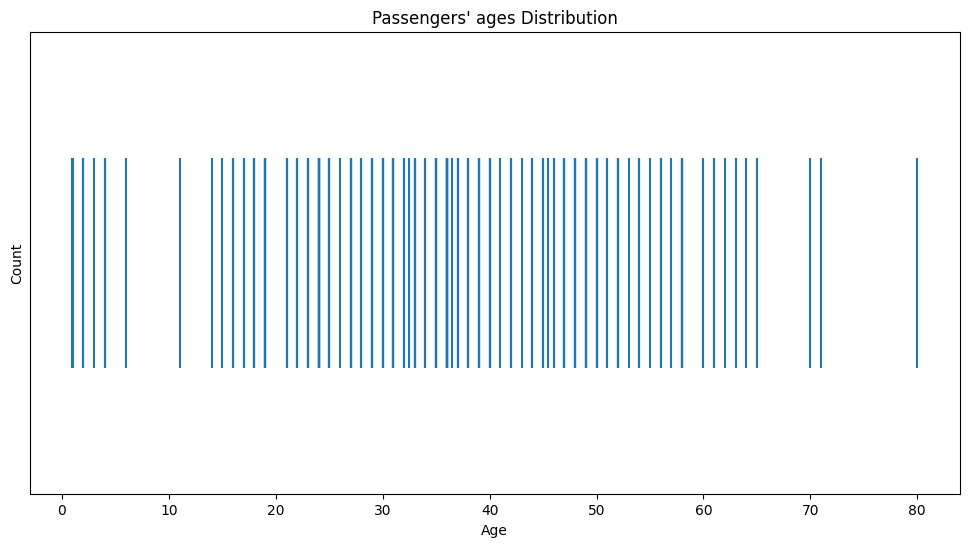

In [58]:
#### 2.3 - Event Plot: Plot the distribution of passengers' ages. (PS: drop all empty values using drop.na())
# Drop rows with missing values in the 'Age' column
titanic_data_age = titanic_data.dropna(subset=['Age'])

# Create the event plot
fig, ax = plt.subplots(figsize=(12, 6))
plt.eventplot(titanic_data_age['Age'], orientation='horizontal')
plt.title('Passengers\' ages Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
# Set y-axis limits and remove y-ticks since it's just showing events
ax.set_yticks([])
plt.show()

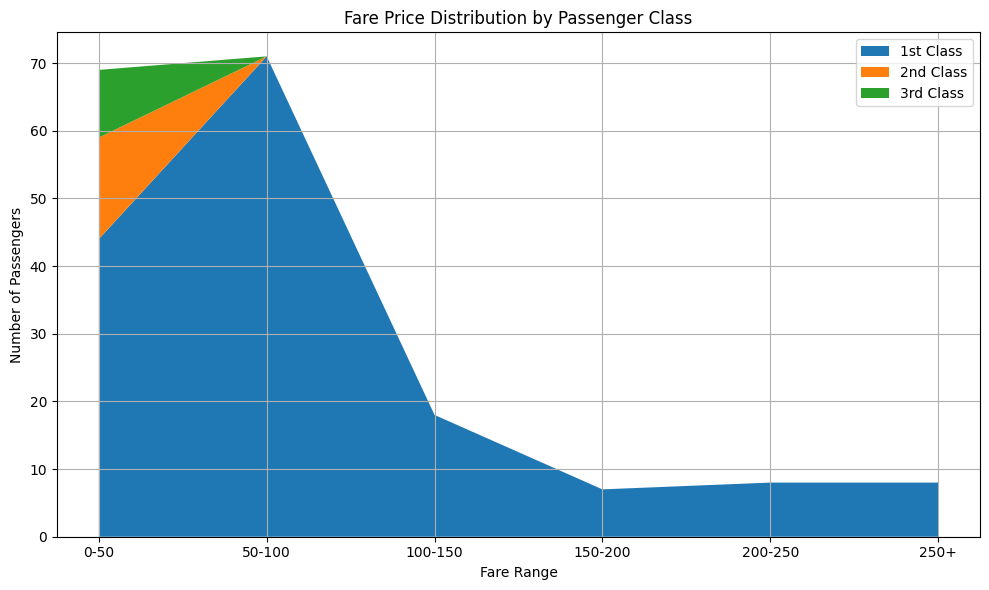

In [59]:
#### 2.4 - Stack plot: Show the distribution of fare prices.

# Create fare bins (e.g., 0-50, 50-100, ..., 250+)
fare_bins = [0, 50, 100, 150, 200, 250, 600]
fare_labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250+']
titanic_data['FareBin'] = pd.cut(titanic_data['Fare'], bins=fare_bins, labels=fare_labels, right=True) #False

# Group by FareBin and Pclass, then count
fare_class_distribution = titanic_data.groupby(['FareBin', 'Pclass'], observed=True).size().unstack(fill_value=0)

# Sort by FareBin order
fare_class_distribution = fare_class_distribution.reindex(fare_labels)

# Plot stack plot
plt.figure(figsize=(10, 6))
plt.stackplot(fare_class_distribution.index,
              fare_class_distribution[1],  # 1st class
              fare_class_distribution[2],  # 2nd class
              fare_class_distribution[3],  # 3rd class
              labels=['1st Class', '2nd Class', '3rd Class'])

plt.title('Fare Price Distribution by Passenger Class')
plt.xlabel('Fare Range')
plt.ylabel('Number of Passengers')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

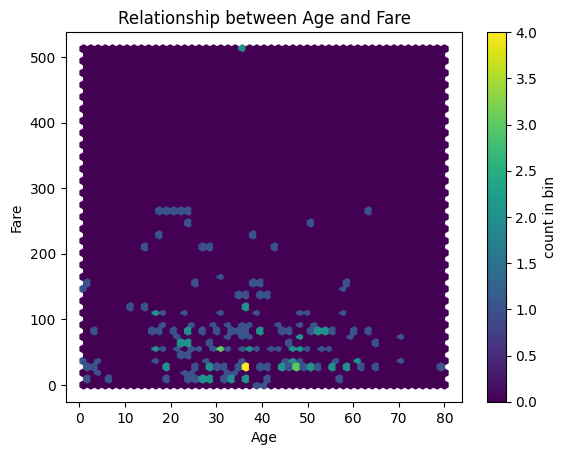

In [60]:
##### 2.5 - Hexagonal Binning plot: Plot the relationship between age and fare.
plt.hexbin(titanic_data['Age'], titanic_data['Fare'], gridsize=50, cmap='viridis')
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar(label='count in bin')
plt.show()

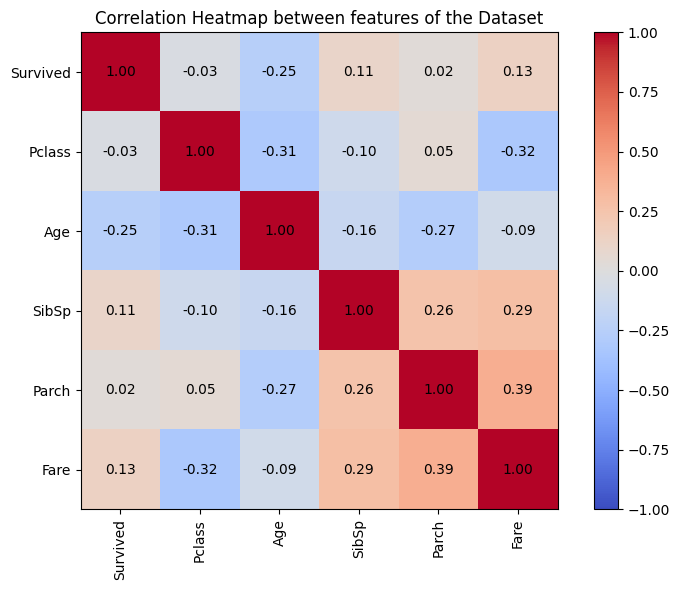

In [61]:
###### 2.6 - Heatmap: Show the correlation between features -['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'].
######         Note: Use corr = titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()


# Select and compute correlation matrix
titan_corr = titanic_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

corr = titan_corr.corr()

# Create the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)

# Annotate the cells with correlation values
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black")

# Set ticks and labels
plt.title('Correlation Heatmap between features of the Dataset')
plt.colorbar()
plt.xticks(range(len(titan_corr.columns)), titan_corr.columns, rotation=90)
plt.yticks(range(len(titan_corr.columns)), titan_corr.columns)
plt.tight_layout()
plt.show()


In [70]:
###### 2.7 - For the following tasks, take a random sample of 10 rows from the dataframe:
import numpy as np

# Take a small sample of the dataset
sample_data = titanic_data.sample(n=10)

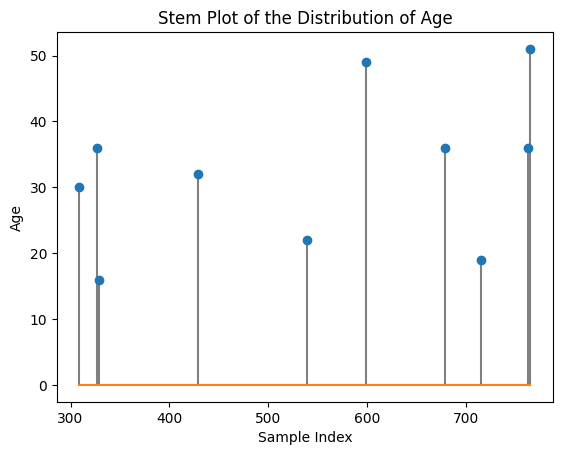

In [71]:
##### 2.7.1 - Stem plot: Plot the distribution of age.
x = sample_data.index
y = sample_data['Age']

plt.stem(x, y, linefmt='grey', markerfmt='C0o', basefmt='C1-')
plt.title('Stem Plot of the Distribution of Age')
plt.xlabel('Sample Index')
plt.ylabel('Age')
plt.show()

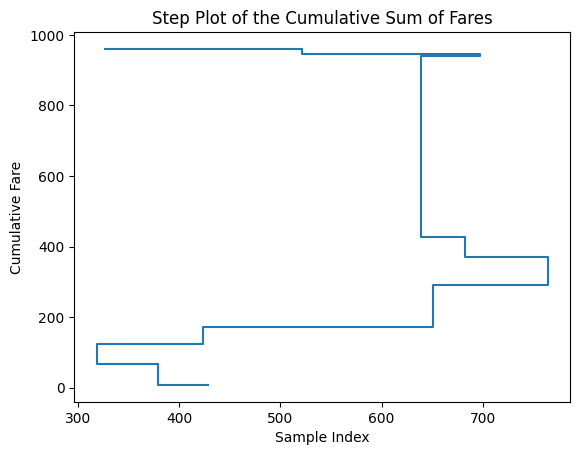

In [72]:
##### 2.7.2 - Step plot: Show the cumulative sum of fares.
plt.step(sample_data.index, sample_data['Fare'].cumsum(), where='mid')
plt.title('Step Plot of the Cumulative Sum of Fares')
plt.xlabel('Sample Index')
plt.ylabel('Cumulative Fare')
plt.show()



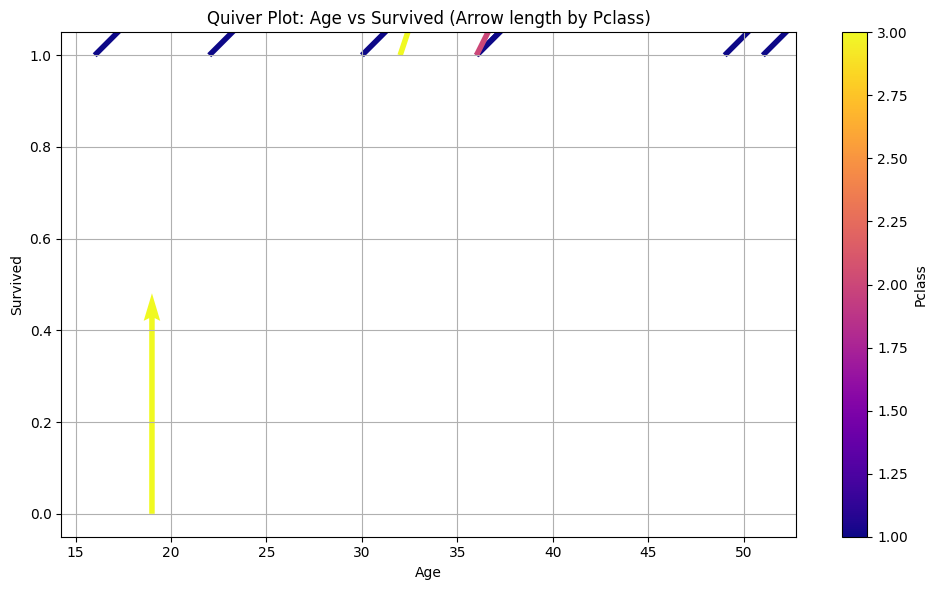

In [73]:
##### 2.7.3 - Quiver plot: Visualize the relationship between age, survived and pclass.

# Extract x and y positions
x = sample_data['Age']
y = sample_data['Survived']

# Define directions for arrows
v = sample_data['Pclass']  # Horizontal component
u = sample_data['Survived']  # Vertical component

# Create quiver plot
plt.figure(figsize=(10, 6))
quiv = plt.quiver(x, y, u, v, sample_data['Pclass'], cmap='plasma', scale=10)
plt.title('Quiver Plot: Age vs Survived (Arrow length by Pclass)')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.colorbar(quiv, label='Pclass')
plt.grid(True)
plt.tight_layout()
plt.show()

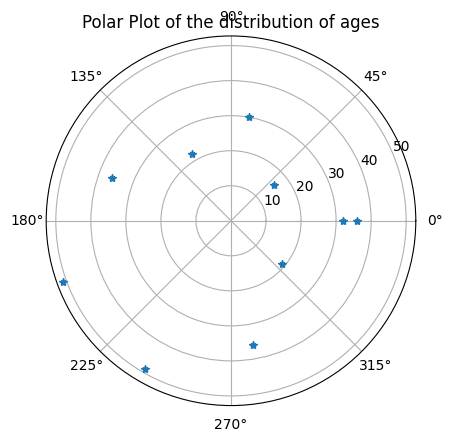

In [74]:
##### 2.7.4 - Polar plot: Plot the distribution of ages in polar coordinates.
theta = np.linspace(0, 2*np.pi, len(sample_data))
r = sample_data['Age']

plt.polar(theta, r, '*')
plt.title('Polar Plot of the distribution of ages')
plt.show()